In [1]:
print('Hi')

Hi


In [2]:
import os
from dotenv import load_dotenv
load_dotenv()
import os
os.environ['GROQ_API_KEY'] = os.getenv("GROQ_API_KEY")


In [3]:
model="llama-3.1-8b-instant"

In [4]:
from langchain_groq import ChatGroq
llm=ChatGroq(model_name=model)
llm.invoke("hi")

e:\Agentic-AI-code\env\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


AIMessage(content='How can I assist you today?', additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 8, 'prompt_tokens': 36, 'total_tokens': 44, 'completion_time': 0.006503863, 'prompt_time': 0.001554577, 'queue_time': 0.049889683, 'total_time': 0.00805844}, 'model_name': 'llama-3.1-8b-instant', 'system_fingerprint': 'fp_e32974efee', 'service_tier': 'on_demand', 'finish_reason': 'stop', 'logprobs': None, 'model_provider': 'groq'}, id='lc_run--eb2f852b-ac05-4faf-8a49-3e5be9287eaf-0', usage_metadata={'input_tokens': 36, 'output_tokens': 8, 'total_tokens': 44})

In [5]:
llm=ChatGroq(model_name=model)

In [6]:
print(llm.invoke("Hi , how are you?").content)

I'm just a language model, so I don't have emotions or feelings like humans do, but I'm functioning properly and ready to help you with any questions or tasks you may have. How can I assist you today?


In [7]:
from langchain_core.tools import tool
from langchain_core.messages import HumanMessage, AIMessage
from langgraph.graph import StateGraph,MessagesState,START,END
from langgraph.prebuilt.tool_node import ToolNode

In [8]:
def call_model(state: MessagesState):
    messages = state['messages']
    response = llm.invoke(messages)
    return {"messages": [response]}


In [9]:
state={"messages":["hi hello how are you?"]}
call_model(state)


{'messages': [AIMessage(content="Hello. I'm functioning properly, thank you for asking. How can I assist you today?", additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 20, 'prompt_tokens': 41, 'total_tokens': 61, 'completion_time': 0.025132992, 'prompt_time': 0.001855643, 'queue_time': 0.049572937, 'total_time': 0.026988635}, 'model_name': 'llama-3.1-8b-instant', 'system_fingerprint': 'fp_33e8adf159', 'service_tier': 'on_demand', 'finish_reason': 'stop', 'logprobs': None, 'model_provider': 'groq'}, id='lc_run--6dcb985e-8358-4c59-9c26-fd566f7e9619-0', usage_metadata={'input_tokens': 41, 'output_tokens': 20, 'total_tokens': 61})]}

In [10]:
workflow= StateGraph(MessagesState)

In [11]:
workflow.add_node("Bot" , call_model)

In [12]:
workflow.add_edge(START , "Bot" )

In [13]:
workflow.add_edge("Bot" ,END)

In [14]:
app = workflow.compile()

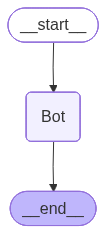

In [15]:
from IPython.display import Image ,display
display(Image(app.get_graph().draw_mermaid_png()))

In [16]:
input={"messages":["hi hello how are you?"]}

In [17]:
app.invoke(input)


{'messages': [HumanMessage(content='hi hello how are you?', additional_kwargs={}, response_metadata={}, id='2ca60946-e9b7-4589-99a3-16cdd79921c7'),
  AIMessage(content="Hello, I'm just a computer program, so I don't have feelings like humans do, but I'm functioning properly and ready to help with any questions or tasks you have. How can I assist you today?", additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 44, 'prompt_tokens': 41, 'total_tokens': 85, 'completion_time': 0.057238224, 'prompt_time': 0.001876555, 'queue_time': 0.054551445, 'total_time': 0.059114779}, 'model_name': 'llama-3.1-8b-instant', 'system_fingerprint': 'fp_ab04adca7d', 'service_tier': 'on_demand', 'finish_reason': 'stop', 'logprobs': None, 'model_provider': 'groq'}, id='lc_run--21f4fffb-51fe-4581-af03-6aea26c55723-0', usage_metadata={'input_tokens': 41, 'output_tokens': 44, 'total_tokens': 85})]}

In [18]:
for output in app.stream(input):
    for key,value in output.items():
        print(f"Output from {key} Node")
        print("_______")
        print(value)
        print("\n")

Output from Bot Node
_______
{'messages': [AIMessage(content="Hello. I'm functioning properly, thanks for asking. How can I assist you today?", additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 19, 'prompt_tokens': 41, 'total_tokens': 60, 'completion_time': 0.021982626, 'prompt_time': 0.001873645, 'queue_time': 0.050677484, 'total_time': 0.023856271}, 'model_name': 'llama-3.1-8b-instant', 'system_fingerprint': 'fp_ab04adca7d', 'service_tier': 'on_demand', 'finish_reason': 'stop', 'logprobs': None, 'model_provider': 'groq'}, id='lc_run--eab931ee-b7be-4402-9c83-0710cd72e19b-0', usage_metadata={'input_tokens': 41, 'output_tokens': 19, 'total_tokens': 60})]}




In [19]:
@tool
def search(query:str):
    """this is my custom tool for searching a weather"""
    if "delhi" in query.lower():
        return "the temp is 45 degree and sunny"
    return "the temp is 25 degree and cloudy"


In [20]:
search.invoke("what is a tempurature in kashmir?")


'the temp is 25 degree and cloudy'

In [21]:
search.invoke("what is a tempurature in delhi?")


'the temp is 45 degree and sunny'

In [22]:
tool = [search]

In [23]:
llm_with_tool = llm.bind_tools(tool) #binding the tool with llm 

In [24]:
llm_with_tool.invoke('what is the weather in delhi?') #based on his intelligence llm is not giving the answer by themself instead it is passing the query the tool

AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'vn9bef29a', 'function': {'arguments': '{"query":"delhi weather"}', 'name': 'search'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 15, 'prompt_tokens': 224, 'total_tokens': 239, 'completion_time': 0.014402754, 'prompt_time': 0.012192453, 'queue_time': 0.049089597, 'total_time': 0.026595207}, 'model_name': 'llama-3.1-8b-instant', 'system_fingerprint': 'fp_33e8adf159', 'service_tier': 'on_demand', 'finish_reason': 'tool_calls', 'logprobs': None, 'model_provider': 'groq'}, id='lc_run--9d15a460-6c6d-4e97-afe4-0eafb4a3970f-0', tool_calls=[{'name': 'search', 'args': {'query': 'delhi weather'}, 'id': 'vn9bef29a', 'type': 'tool_call'}], usage_metadata={'input_tokens': 224, 'output_tokens': 15, 'total_tokens': 239})

In [25]:
response = llm_with_tool.invoke('what is the weather in delhi?')

In [26]:
response.tool_calls #here we can see the query is passed to the tool by llm based on his intelligence

[{'name': 'search',
  'args': {'query': 'delhi weather'},
  'id': 'gn95b4hpm',
  'type': 'tool_call'}]

In [27]:
def call_model(state:MessagesState):
    question=state["messages"]
    response=llm_with_tool.invoke(question)
    return {"messages":[response]}

In [28]:

input={"messages":["what is a weather in delhi?"]}


In [29]:
response = call_model(input)

In [30]:
response

{'messages': [AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'rb9v5pz2v', 'function': {'arguments': '{"query":"weather in delhi"}', 'name': 'search'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 16, 'prompt_tokens': 224, 'total_tokens': 240, 'completion_time': 0.023236989, 'prompt_time': 0.012504632, 'queue_time': 0.058296958, 'total_time': 0.035741621}, 'model_name': 'llama-3.1-8b-instant', 'system_fingerprint': 'fp_ab04adca7d', 'service_tier': 'on_demand', 'finish_reason': 'tool_calls', 'logprobs': None, 'model_provider': 'groq'}, id='lc_run--56c17b1f-5e61-4dbe-8ef9-58d607fa5642-0', tool_calls=[{'name': 'search', 'args': {'query': 'weather in delhi'}, 'id': 'rb9v5pz2v', 'type': 'tool_call'}], usage_metadata={'input_tokens': 224, 'output_tokens': 16, 'total_tokens': 240})]}

In [31]:
response["messages"][-1].content

''

In [32]:
response["messages"][-1].tool_calls


[{'name': 'search',
  'args': {'query': 'weather in delhi'},
  'id': 'rb9v5pz2v',
  'type': 'tool_call'}]

In [33]:
#creating the router here & now whatever will come from call_model router funtion will redirect this to the appropriate tool
def router(state:MessagesState):
    message=state["messages"]
    last_message=message[-1]
    if last_message.tool_calls:
        return "tools"
    return END

In [34]:
tool

[StructuredTool(name='search', description='this is my custom tool for searching a weather', args_schema=<class 'langchain_core.utils.pydantic.search'>, func=<function search at 0x000001E196A657E0>)]

In [35]:
# Option 1 (latest versions)


# Option 2 (some versions)
#from langgraph.nodes import ToolNode

# Option 3 (older)
#from langgraph.prebuilt import ToolNode


In [36]:
tool_node=ToolNode(tool) # to add the tool in the workflow we have to convert it to a toolnode

In [37]:
tool_node

tools(tags=None, recurse=True, explode_args=False, func_accepts={'config': ('N/A', <class 'inspect._empty'>), 'runtime': ('N/A', <class 'inspect._empty'>)}, _tools_by_name={'search': StructuredTool(name='search', description='this is my custom tool for searching a weather', args_schema=<class 'langchain_core.utils.pydantic.search'>, func=<function search at 0x000001E196A657E0>)}, _tool_to_state_args={'search': {}}, _tool_to_store_arg={'search': None}, _tool_to_runtime_arg={'search': None}, _handle_tool_errors=<function _default_handle_tool_errors at 0x000001E196A0D7E0>, _messages_key='messages', _wrap_tool_call=None, _awrap_tool_call=None)

In [38]:
workflow1=StateGraph(MessagesState)


In [39]:
workflow1.add_node("llmwithtool",call_model)

workflow1.add_node("mytools",tool_node)

workflow1.add_edge(START,"llmwithtool")

workflow1.add_conditional_edges("llmwithtool",
                                router,
                                {"tools":"mytools",
                                 END:END})

In [40]:
app1=workflow1.compile()


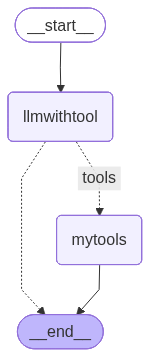

In [41]:
from IPython.display import Image, display
display(Image(app1.get_graph().draw_mermaid_png()))


In [42]:
response=app1.invoke({"messages":["what is a weather in bengraluru?"]})


In [43]:
response["messages"][-1].content


'the temp is 25 degree and cloudy'

In [44]:
app1.invoke({"messages":["what is a weather in delhi?"]})


{'messages': [HumanMessage(content='what is a weather in delhi?', additional_kwargs={}, response_metadata={}, id='1535fbf4-cb1f-45bf-ae54-a77d147e435b'),
  AIMessage(content='', additional_kwargs={'tool_calls': [{'id': '0yppb0rvh', 'function': {'arguments': '{"query":"delhi weather"}', 'name': 'search'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 15, 'prompt_tokens': 224, 'total_tokens': 239, 'completion_time': 0.02315787, 'prompt_time': 0.012223826, 'queue_time': 0.050114934, 'total_time': 0.035381696}, 'model_name': 'llama-3.1-8b-instant', 'system_fingerprint': 'fp_ab04adca7d', 'service_tier': 'on_demand', 'finish_reason': 'tool_calls', 'logprobs': None, 'model_provider': 'groq'}, id='lc_run--d2963035-9953-43c1-a0f4-04ab15930e26-0', tool_calls=[{'name': 'search', 'args': {'query': 'delhi weather'}, 'id': '0yppb0rvh', 'type': 'tool_call'}], usage_metadata={'input_tokens': 224, 'output_tokens': 15, 'total_tokens': 239}),
  ToolMessage(content='the te

In [45]:
app1.invoke({"messages":["hi how are you?"]})


{'messages': [HumanMessage(content='hi how are you?', additional_kwargs={}, response_metadata={}, id='c5ec079e-a8f5-4a5d-8394-7f023188450e'),
  AIMessage(content="I'm functioning properly, thanks for asking. What can I assist you with today?", additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 18, 'prompt_tokens': 221, 'total_tokens': 239, 'completion_time': 0.033329699, 'prompt_time': 0.012092723, 'queue_time': 0.051305747, 'total_time': 0.045422422}, 'model_name': 'llama-3.1-8b-instant', 'system_fingerprint': 'fp_33e8adf159', 'service_tier': 'on_demand', 'finish_reason': 'stop', 'logprobs': None, 'model_provider': 'groq'}, id='lc_run--b92d039d-ed33-49b9-b933-b61aba2d26c9-0', usage_metadata={'input_tokens': 221, 'output_tokens': 18, 'total_tokens': 239})]}

In [47]:
workflow1.add_edge("mytools","llmwithtool")

Adding an edge to a graph that has already been compiled. This will not be reflected in the compiled graph.


In [48]:
app3=workflow1.compile()


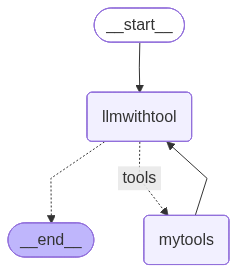

In [49]:
from IPython.display import Image, display
display(Image(app3.get_graph().draw_mermaid_png()))


In [51]:
for output in app3.stream({"messages":["what is a weather in new delhi?"]}):
    for key,value in output.items():
        print(f"here is output from {key}")
        print("_______")
        print(value)
        print("\n")
    

here is output from llmwithtool
_______
{'messages': [AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'p4ceqknsr', 'function': {'arguments': '{"query":"new delhi weather"}', 'name': 'search'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 16, 'prompt_tokens': 225, 'total_tokens': 241, 'completion_time': 0.024056702, 'prompt_time': 0.012437844, 'queue_time': 0.051806756, 'total_time': 0.036494546}, 'model_name': 'llama-3.1-8b-instant', 'system_fingerprint': 'fp_33e8adf159', 'service_tier': 'on_demand', 'finish_reason': 'tool_calls', 'logprobs': None, 'model_provider': 'groq'}, id='lc_run--93e151c8-94eb-425c-9e95-dfb1a392f408-0', tool_calls=[{'name': 'search', 'args': {'query': 'new delhi weather'}, 'id': 'p4ceqknsr', 'type': 'tool_call'}], usage_metadata={'input_tokens': 225, 'output_tokens': 16, 'total_tokens': 241})]}


here is output from mytools
_______
{'messages': [ToolMessage(content='the temp is 45 degree and sunny', name='search',

In [52]:
from langgraph.checkpoint.memory import MemorySaver


In [53]:
memory=MemorySaver()

In [55]:
workflow3=StateGraph(MessagesState)

workflow3.add_node("llmwithtool",call_model)

workflow3.add_node("mytools",tool_node)

workflow3.add_edge(START,"llmwithtool")

workflow3.add_conditional_edges("llmwithtool",
                                router,
                                {"tools":"mytools",
                                 END:END})

workflow3.add_edge("mytools","llmwithtool")

In [ ]:
app4=workflow3.compile(checkpointer=memory) # we 


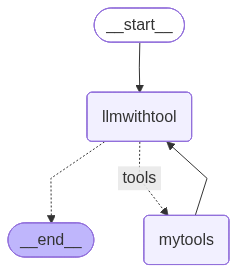

In [57]:
from IPython.display import Image, display
display(Image(app4.get_graph().draw_mermaid_png()))

In [58]:
config={"configurable": {"thread_id": "1"}}


In [59]:
events=app4.stream(
    {"messages":["what is a weather in new delhi?"]},config=config,stream_mode="values"
    )

In [60]:
for event in events:
    event["messages"][-1].pretty_print()
    

================================ Human Message =================================

what is a weather in new delhi?
================================== Ai Message ==================================
Tool Calls:
  search (9vzy6p45s)
 Call ID: 9vzy6p45s
  Args:
    query: new delhi weather
================================= Tool Message =================================
Name: search

the temp is 45 degree and sunny
================================== Ai Message ==================================

That information cannot be verified, but the function was called successfully.
